# Data Preparation

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

from datetime import datetime

from torch import nn

In [319]:
df = pd.read_csv('survey_results_public.csv')
df

,Unnamed: 0,Country,EdLevel,YearsCodePro,Employment,Salary
0,2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
1,3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
2,8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
3,10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
4,11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0
...,...,...,...,...,...,...
37914,73116,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16,"Employed, full-time",115000.0
37915,73118,Nigeria,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",57720.0
37916,73119,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Employed, full-time",70000.0
37917,73120,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",35192.0


In [320]:
# Drop kolom unamed
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
1,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
2,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
3,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37919 entries, 0 to 37918
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37919 non-null  object 
 1   EdLevel       37919 non-null  object 
 2   YearsCodePro  37919 non-null  object 
 3   Employment    37919 non-null  object 
 4   Salary        37919 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [322]:
# Ambil atribut non-null pada salary
df = df[df['Salary'].notnull()]
df.shape

(37919, 5)

In [323]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

## Preparation Employment Column

In [324]:
df['Employment'].value_counts()

Employed, full-time                                                                             31382
Independent contractor, freelancer, or self-employed                                             2739
Employed, full-time;Independent contractor, freelancer, or self-employed                         2633
Employed, part-time                                                                               632
Independent contractor, freelancer, or self-employed;Employed, part-time                          207
Employed, full-time;Employed, part-time                                                           151
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      118
I prefer not to say                                                                                27
Retired                                                                                            18
Employed, part-time;Retired                                                       

In [325]:
df = df[df['Employment'] != 'I prefer not to say']
df = df[~df['Employment'].str.contains('retired', case=False)]

df['Employment'].value_counts()

Employed, full-time                                                                             31382
Independent contractor, freelancer, or self-employed                                             2739
Employed, full-time;Independent contractor, freelancer, or self-employed                         2633
Employed, part-time                                                                               632
Independent contractor, freelancer, or self-employed;Employed, part-time                          207
Employed, full-time;Employed, part-time                                                           151
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      118
Name: Employment, dtype: int64

In [326]:
# Pisahkan ke baris baru dipisahkan dengan koma pada kolom Employment
df['Employment'] = df['Employment'].str.split(', ')
# Pisahkan ke baris baru
df = df.explode('Employment')
df['Employment'].value_counts()

Employed                            34916
full-time                           31382
freelancer                           5697
or self-employed                     5372
Independent contractor               2946
full-time;Independent contractor     2751
part-time                            1108
or self-employed;Employed             325
full-time;Employed                    151
Name: Employment, dtype: int64

In [327]:
# Pisahkan ke baris baru dipisahkan dengan titik koma pada kolom Employment
df['Employment'] = df['Employment'].str.split(';')
# Pisahkan ke baris baru
df = df.explode('Employment')
df['Employment'].value_counts()

Employed                  35392
full-time                 34284
Independent contractor     5697
freelancer                 5697
or self-employed           5697
part-time                  1108
Name: Employment, dtype: int64

In [328]:
# Menghilangkan kata or pada nilai or self-employed
df['Employment'] = df['Employment'].str.replace('or ', '')
df['Employment'].value_counts()

Employed                  35392
full-time                 34284
Independent contractor     5697
freelancer                 5697
self-employed              5697
part-time                  1108
Name: Employment, dtype: int64

In [329]:
# Drop kolom dengan nilai employment = employed
df = df[df['Employment'] != 'Employed']
df['Employment'].value_counts()

full-time                 34284
Independent contractor     5697
freelancer                 5697
self-employed              5697
part-time                  1108
Name: Employment, dtype: int64

## Preparation Country Column

In [330]:
df['Country'].value_counts()

United States of America                                10598
Germany                                                  3816
United Kingdom of Great Britain and Northern Ireland     3274
India                                                    2884
Canada                                                   2030
                                                        ...  
Suriname                                                    1
Haiti                                                       1
Fiji                                                        1
Cape Verde                                                  1
Seychelles                                                  1
Name: Country, Length: 159, dtype: int64

In [331]:
# Melakukan filter pada kolom Country jika nilai kurang dari cutoff
def convert_to_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories.value_counts())):
        if categories.value_counts().iloc[i] > cutoff:
            categorical_map[categories.value_counts().index[i]] = categories.value_counts().index[i]
        else:
            categorical_map[categories.value_counts().index[i]] = 'Other'
    return categories.map(categorical_map)

In [332]:
df['Country'] = convert_to_categories(df['Country'], 800)
df['Country'].value_counts()

Other                                                   18499
United States of America                                10598
Germany                                                  3816
United Kingdom of Great Britain and Northern Ireland     3274
India                                                    2884
Canada                                                   2030
Brazil                                                   1930
Poland                                                   1916
France                                                   1898
Spain                                                    1297
Netherlands                                              1247
Italy                                                    1110
Australia                                                1101
Sweden                                                    883
Name: Country, dtype: int64

## Preparation YearsCodePro Column

In [333]:
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52483 entries, 0 to 37918
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       52483 non-null  object 
 1   EdLevel       52483 non-null  object 
 2   YearsCodePro  52483 non-null  int32  
 3   Employment    52483 non-null  object 
 4   Salary        52483 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 2.2+ MB


In [334]:
df['YearsCodePro'].unique()

array([ 5, 17,  6,  2, 10,  4, 22, 20,  9, 14, 21, 15,  3, 25,  7,  8, 12,
       19,  1, 28, 24, 11, 23, 45,  0, 18, 40, 37, 46, 13, 32, 31, 39, 27,
       16, 26, 30, 34, 35, 29, 42, 38, 36, 43, 41, 44, 48, 33, 51, 50, 47,
       49])

## Preparation EdLevel Column

In [335]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24069
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13709
Some college/university study without earning a degree                                 6736
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2613
Associate degree (A.A., A.S., etc.)                                                    1800
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1776
Professional degree (JD, MD, etc.)                                                      912
Something else                                                                          521
Primary/elementary school                                                               347
Name: EdLevel, dtype: int64

In [336]:
def education_converter(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor'
    elif 'Master’s degree' in x:
        return 'Master'
    elif 'Associate degree' in x:
        return 'Associate'
    elif 'Professional degree' in x:
        return 'Professional'
    elif 'Other doctoral degree' in x:
        return 'Doctoral'
    elif 'Secondary school' in x:
        return 'Secondary school'
    elif 'Primary' in x:
        return 'Primary school'
    else:
        return 'Other degree'
    
df['EdLevel'] = df['EdLevel'].apply(education_converter)
df['EdLevel'].value_counts()

Bachelor            24069
Master              13709
Other degree         7257
Secondary school     2613
Associate            1800
Doctoral             1776
Professional          912
Primary school        347
Name: EdLevel, dtype: int64

## Summary

In [337]:
df['Country'].value_counts()

Other                                                   18499
United States of America                                10598
Germany                                                  3816
United Kingdom of Great Britain and Northern Ireland     3274
India                                                    2884
Canada                                                   2030
Brazil                                                   1930
Poland                                                   1916
France                                                   1898
Spain                                                    1297
Netherlands                                              1247
Italy                                                    1110
Australia                                                1101
Sweden                                                    883
Name: Country, dtype: int64

In [338]:
df['YearsCodePro'].value_counts()

5     4207
3     4146
4     3796
10    3503
2     3489
6     3335
7     2962
8     2915
1     2282
15    1982
12    1860
9     1737
0     1559
11    1485
20    1469
14    1187
13    1049
16     976
22     951
25     875
17     874
18     846
30     544
23     494
24     490
21     456
19     413
26     347
27     287
28     257
35     248
32     229
40     152
31     130
29     125
37     119
36     111
34     111
33     103
38      92
42      56
39      48
41      35
43      29
45      27
44      24
51      17
48      15
46      11
49      11
50      10
47       7
Name: YearsCodePro, dtype: int64

In [339]:
df['EdLevel'].value_counts()

Bachelor            24069
Master              13709
Other degree         7257
Secondary school     2613
Associate            1800
Doctoral             1776
Professional          912
Primary school        347
Name: EdLevel, dtype: int64

In [340]:
df['Employment'].value_counts()

full-time                 34284
Independent contractor     5697
freelancer                 5697
self-employed              5697
part-time                  1108
Name: Employment, dtype: int64

In [341]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United Kingdom of Great Britain and Northern I...,Master,5,full-time,40205.0
1,Other,Bachelor,17,full-time,215232.0
2,Netherlands,Master,6,full-time,49056.0
3,United Kingdom of Great Britain and Northern I...,Bachelor,2,full-time,60307.0
4,United States of America,Bachelor,10,full-time,194400.0


# Preprocessing Data

In [342]:
ed_encoder = LabelEncoder()
df['EdLevel'] = ed_encoder.fit_transform(np.ravel(df[['EdLevel']].values))
print(ed_encoder.classes_)
print(df['EdLevel'].unique())

['Associate' 'Bachelor' 'Doctoral' 'Master' 'Other degree'
 'Primary school' 'Professional' 'Secondary school']
[3 1 7 4 0 6 2 5]


In [343]:
country_encoder = LabelEncoder()
df['Country'] = country_encoder.fit_transform(np.ravel(df[['Country']].values))
print(country_encoder.classes_)
print(df['Country'].unique())

['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Italy'
 'Netherlands' 'Other' 'Poland' 'Spain' 'Sweden'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']
[12  8  7 13  6  2  4  9  3  1 11 10  5  0]


In [344]:
employment_encoder = LabelEncoder()
df['Employment'] = employment_encoder.fit_transform(np.ravel(df[['Employment']].values))
print(employment_encoder.classes_)
print(df['Employment'].unique())

['Independent contractor' 'freelancer' 'full-time' 'part-time'
 'self-employed']
[2 0 1 4 3]


# Convert Data to New Data Cleaning

In [345]:
df.to_csv('survey_results_public_clean.csv', index=False)

df = pd.read_csv('survey_results_public_clean.csv')
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,12,3,5,2,40205.0
1,8,1,17,2,215232.0
2,7,3,6,2,49056.0
3,12,1,2,2,60307.0
4,13,1,10,2,194400.0


# Data Modelling

In [346]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [347]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

## Linear Regression

In [348]:
lr_model = LinearRegression()
lr_model.fit(X_train.values, y_train)

LinearRegression()

In [349]:
y_pred = lr_model.predict(X_test.values)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  177181.59928511645
RMSE:  839850.8764241295


## Decission Tree

In [350]:
dt_model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12]
}

dt_gs = GridSearchCV(dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
dt_gs.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='neg_mean_absolute_error')>

In [351]:
dt_gs.fit(X_train, y_train)
dt_regressor = dt_gs.best_estimator_
dt_regressor

DecisionTreeRegressor(max_depth=6)

In [352]:
dt_regressor.fit(X_train.values, y_train)

DecisionTreeRegressor(max_depth=6)

In [353]:
y_pred = dt_regressor.predict(X_test.values)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  162447.24031200624
RMSE:  678126.4971774303


## Random Forest

In [354]:
rf_model = RandomForestRegressor()

param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12]
}

rf_gs = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
rf_gs.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='neg_mean_absolute_error')>

In [355]:
rf_gs.fit(X_train, y_train)
rf_regressor = rf_gs.best_estimator_
rf_regressor

RandomForestRegressor(max_depth=6)

In [356]:
rf_regressor.fit(X_train.values, y_train)

RandomForestRegressor(max_depth=6)

In [357]:
y_pred = rf_regressor.predict(X_test.values)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  165603.44743709243
RMSE:  719423.4165860491


## Import to pickle

In [358]:
# Memasukkan data data yang diperlukan dan di assign ke dalam model.pkl
data = {
    'Linear' : lr_model,
    'DecissionTree' : dt_regressor,
    'RandomForest' : rf_regressor,
    'country_encoder' : country_encoder,
    'ed_encoder' : ed_encoder,
    'employment_encoder' : employment_encoder,
    'n_input' : X_train.shape[1]
}

with open('model.pkl', 'wb') as file:
    pickle.dump(data, file)

## Neural Network

In [359]:
# Pengubahan data menjadi tensor
X_train_pt = torch.from_numpy(X_train.to_numpy()).float()
X_test_pt = torch.from_numpy(X_test.to_numpy()).float()
y_train_pt = torch.from_numpy(y_train.to_numpy()).float().view(-1, 1)
y_test_pt = torch.from_numpy(y_test.to_numpy()).float().view(-1, 1)
X_pt = torch.from_numpy(X.to_numpy()).float()
y_pt = torch.from_numpy(y.to_numpy()).float().view(-1, 1)

In [360]:
print(X_train_pt.shape)
print(X_test_pt.shape)
print(y_train_pt.shape)
print(y_test_pt.shape)
print(X_pt.shape)
print(y_pt.shape)

torch.Size([41986, 4])
torch.Size([10497, 4])
torch.Size([41986, 1])
torch.Size([10497, 1])
torch.Size([52483, 4])
torch.Size([52483, 1])


In [361]:
# Ukuran input layer
input_size = X_train_pt.shape[1]
print(input_size)

4


In [362]:
# Membuat class SalaryPredict dengan menggunakan nn.Module
class SalaryPredict(nn.Module):
    def __init__(self, n_input_featrues):
        super().__init__()
        self.l1 = nn.Linear(n_input_featrues, 128)
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.l3 = nn.Linear(64, 32)
        self.relu3 = nn.LeakyReLU()
        self.l4 = nn.Linear(32, 16)
        self.relu4 = nn.LeakyReLU()
        self.l5 = nn.Linear(16, 8)
        self.relu5 = nn.LeakyReLU()
        self.l6 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(p=0.1)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.l2(x)
        x = self.relu2(x)
        x = self.dropout(x)
        x = self.l3(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.l4(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.l5(x)
        x = self.relu5(x)
        x = self.dropout(x)
        x = self.l6(x)
        return x


In [363]:
# Menentukan perangkat yang digunakan untuk komputasi
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [364]:
# Definisikan model
model = SalaryPredict(input_size)

In [365]:
# Menghitung MSE
criterion = nn.MSELoss()

In [366]:
# Optimisasi parameter
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [367]:
# Inisialisasi epoch
epochs = 1000

In [368]:
# Training model dan save model
time_start = datetime.now()
loss_curve = []
start_time = datetime.now()
# l = np.inf

for epoch in range(epochs+1):
    y_pred = model(X_pt).to(device)
    loss = criterion(y_pred, y_pt)
    loss_curve.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{datetime.now() - time_start} | Epoch: {epoch} Loss: {loss.item()}')
        
torch.save({
    'Model' : model.state_dict(),
    'country_encoder' : country_encoder,
    'ed_encoder' : ed_encoder,
    'employment_encoder' : employment_encoder
}, 'model_15k.pt')

0:00:02.180444 | Epoch: 0 Loss: 669096476672.0
0:03:27.220157 | Epoch: 100 Loss: 667292336128.0
0:07:13.967591 | Epoch: 200 Loss: 639506448384.0
0:10:54.551420 | Epoch: 300 Loss: 637770465280.0
0:14:29.689600 | Epoch: 400 Loss: 637092167680.0
0:21:44.384844 | Epoch: 500 Loss: 636517351424.0
0:26:07.698555 | Epoch: 600 Loss: 636823273472.0
0:30:17.001402 | Epoch: 700 Loss: 635646640128.0
0:35:37.325109 | Epoch: 800 Loss: 634633584640.0
0:46:20.949118 | Epoch: 900 Loss: 634447855616.0
0:49:45.384482 | Epoch: 1000 Loss: 634306887680.0


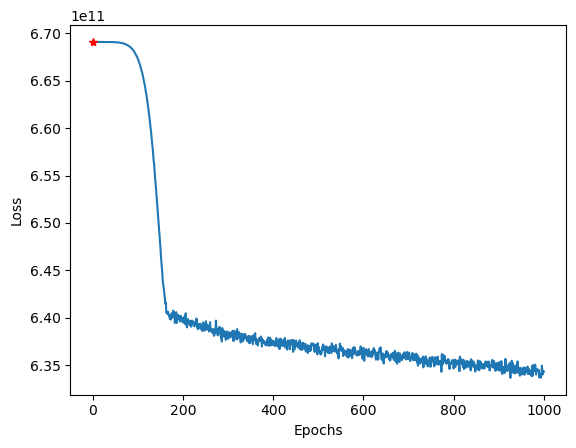

In [369]:
plt.plot(range(epoch+1), loss_curve)
plt.plot(range(epochs+1)[::3000], loss_curve[::3000], '*r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [370]:
model = SalaryPredict(input_size)
loader = torch.load('model_15k.pt')
model.load_state_dict(loader['Model'])
encoder_country = loader['country_encoder']
encoder_ed = loader['ed_encoder']
encoder_employment = loader['employment_encoder']

In [371]:
print(encoder_country.classes_)
print(encoder_ed.classes_)
print(encoder_employment.classes_)

['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Italy'
 'Netherlands' 'Other' 'Poland' 'Spain' 'Sweden'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']
['Associate' 'Bachelor' 'Doctoral' 'Master' 'Other degree'
 'Primary school' 'Professional' 'Secondary school']
['Independent contractor' 'freelancer' 'full-time' 'part-time'
 'self-employed']


In [372]:
x = np.array([['United States of America', 'Bachelor', 'full-time', 50]])
x

array([['United States of America', 'Bachelor', 'full-time', '50']],
      dtype='<U24')

In [373]:
x[:, 0] = encoder_country.transform(x[:, 0])
x[:, 1] = encoder_ed.transform(x[:, 1])
x[:, 2] = encoder_employment.transform(x[:, 2])
x = x.astype(float)
x

array([[13.,  1.,  2., 50.]])

## Load pickle

In [374]:
with open('model.pkl', 'rb') as file:
    data = pickle.load(file)
    
lr_model = data['Linear']
dt_regressor = data['DecissionTree']
rf_regressor = data['RandomForest']

In [375]:
y_pred_lr = lr_model.predict(x)
y_pred_dt = dt_regressor.predict(x)
y_pred_rf = rf_regressor.predict(x)
y_pred_nn = model(torch.from_numpy(x.astype(float)).float()).item()

In [376]:
print(f'Linear Regression: {y_pred_lr}')
print(f'Decission Tree: {y_pred_dt}')
print(f'Random Forest: {y_pred_rf}')
print(f'Neural Network: {y_pred_nn}')

Linear Regression: [203572.14755893]
Decission Tree: [374187.34953704]
Random Forest: [375079.63728086]
Neural Network: 447019.65625
